# **Pandas**

*A biblioteca `pandas` fornece estruturas de dados de alto desempenho, fáceis de usar e ferramentas de análise de dados. Sua principal estrutura de dados é o `DataFrame`, que você pode considerar como uma tabela 2D na memória (como uma planilha, com nomes de colunas e rótulos de linha). Muitos recursos disponíveis no Excel estão disponíveis programaticamente, como a criação de tabelas dinâmicas, a computação de colunas com base em outras colunas, a plotagem de gráficos etc. Você também pode agrupar linhas por valor da coluna ou usar joins entre tabelas, como no SQL.*

Pré-requisitos:
*NumPy*

# Setup
Garante que o notebook vai funcionar com python 2 and 3:

In [608]:
from __future__ import division, print_function, unicode_literals

Iportar o pandas

In [609]:
import pandas as pd

# Objetos `Series`

A biblioteca `pandas` contém algumas estrutura de dados muito úteis:
* `Series`: Um objeto `Series` é um array 1D, semelhante a uma coluna em uma planilha (com o nome da coluna e os rótulos das linhas).
* `DataFrame`: uma tabela 2D, semelhante a uma planilha (com nomes de colunas e rótulos de linha).
* `Panel`: Você pode ver um `Painel` como um dicionário de` DataFrame`s. Como são menos utilizados, não discutiremos aqui.

## Criando uma `Series`

In [610]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar ao um `ndarray`
Os objetos `Series` se comportam como o NumPy `ndarray` 1D, e você pode frequentemente passá-los como parâmetros para as funções do NumPy:

In [611]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Operações aritméticas em `Series` também são possíveis, e elas se aplicam *elemento a elemento*, assim como no `ndarray`s:

In [612]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Semelhante ao NumPy, se você adicionar um único número a uma `Série`, esse número será adicionado a todos os itens na `Série`. Isso é chamado *broadcasting*:

In [613]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

O mesmo vale para todas as operações binárias, como `*` ou `/`, e até para operações condicionais:

In [614]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Rótulos de índices
Cada item em um objeto `Series` possui um identificador exclusivo chamado *index label*. Por padrão, é simplesmente a posição do item na `Série` (começando em 0), mas você também pode definir os rótulos dos índices manualmente:

In [615]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

Você pode usar o `Series` exatamente como um` dict`:

In [616]:
s2["bob"]

83

Você ainda pode acessar os itens por localização inteira, como em uma matriz regular:

In [617]:
s2[1]

83

Para deixar claro se você está acessando por rótulo ou por índice, é recomendável sempre usar o atributo `loc` ao acessar por rótulo e o atributo` iloc` ao acessar por índice:

In [618]:
s2.loc["bob"]

83

In [619]:
s2.iloc[1]

83

Dividir uma `Series` também divide seus índices:

In [620]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

Isso pode levar a resultados inesperados ao usar os rótulos numéricos padrão, portanto, tenha cuidado:

In [621]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [622]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Veja! O primeiro elemento possui o índice `2`. O elemento com o índice `0` está ausente nessa fatia da serie anterior:

In [623]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


Mas lembre-se de que você pode acessar elementos por localização inteira usando o atributo `iloc`. Isso ilustra outro motivo pelo qual é sempre melhor usar `loc` e` iloc` para acessar objetos `Series`:

In [624]:
surprise_slice.iloc[0]

1002

## Iniciar a partir de um `dict`
Você pode criar um objeto `Series` a partir de um `dict`. As chaves serão usadas como rótulos de índices:

In [625]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

Você pode controlar quais elementos deseja incluir na `Serie` e em que ordem, especificando explicitamente o `index` desejado:

In [626]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Alinhamento automático
Quando uma operação envolve vários objetos `Series`, o `pandas` alinha automaticamente os itens combinando os rótulos dos índices.

In [627]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

A `Serie` resultante contém a união dos rótulos dos índices de `s2` e `s3`. Como `colin` está ausente de `s2` e `charles` está ausente de `s3`, esses itens têm um valor de resultado `NaN`. (ou seja, *Not-a-Number* significa *valor ausente*).

O alinhamento automático é muito útil ao trabalhar com dados que podem vir de várias fontes com estrutura variável e itens ausentes. Mas se você esquecer de definir os rótulos dos índices corretamente, poderá obter resultados inesperados:

In [628]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

o Pandas não conseguiu alinhar as `Series`, já que seus rótulos não correspondem, portanto, o resultado foi tudo `NaN`.

## Iniciando com uma constante
Você também pode inicializar um objeto `Series` usando um único elemento e uma lista de rótulos de índice: todos os itens serão configurados para ter o elemento.

In [629]:
respota_de_tudo = pd.Series(42, ["vida", "universo", "e tudo mais"])
respota_de_tudo

vida           42
universo       42
e tudo mais    42
dtype: int64

## Nome da `Series`

In [630]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plotando uma `Series`
O Pandas facilita a plotagem de dados em uma `Series` usando o `matplotlib`. Apenas importe o `matplotlib` e chame o método `plot()`:

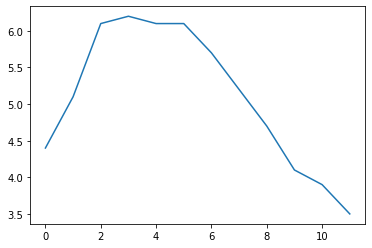

In [631]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

Existem várias opções para plotar seus dados. Não é necessário listá-los todos aqui: se você precisar de um tipo específico de plotagem (histogramas, gráficos de pizza, etc.), procure-o na excelente seção de [Visualização](http://pandas.pydata.org/pandas-docs/stable/visualization.html) na documentação do pandas.

# Trabalhando com tempo
Muitos conjuntos de dados têm registros de data e hora, e o panda é incrível ao manipular esses dados:
* da para representar períodos (como 2016Q3) e frequências (como "mensalmente"),
* da para fazer reamostragem dos dados e agregar valores da maneira que desejar,
* da para lida lidar com fusos horários.

## Intervalos de tempo
Vamos começar criando uma série temporal usando `pd.date_range ()`. Isso retorna um `DatetimeIndex` contendo uma data e hora por hora durante 12 horas, começando em 29 de outubro de 2016 às 17:30.

In [632]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

Esse `DatetimeIndex` pode ser usado como índice de uma `Series`:

In [633]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

Vamos plotar essa série

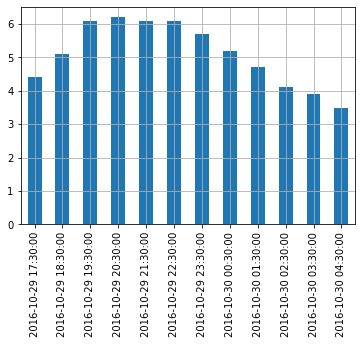

In [634]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

## Resample()
O Pandas nos permite redefinir uma série temporal de maneira muito simples. Basta chamar o método `resample()` e especificar uma nova frequência:

In [635]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

Obtermos um objeto ` DatetimeIndexResampler`. Para realmente executar a operação de reamostragem, podemos simplesmente chamar o método `mean()`: O Pandas calculará a média de cada par de horas consecutivas:

In [636]:
temp_series_freq_2H = temp_series_freq_2H.mean()

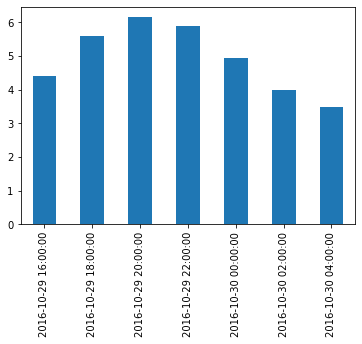

In [637]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

Observe como os valores foram agregados automaticamente em períodos de 2 horas. Se observarmos o período das 18h às 20h, por exemplo, tínhamos um valor de `5,1` às 18h30 e `6,1` às 19h30. Após a reamostragem, temos apenas um valor de `5.6`, que é a média de `5.1` e `6.1`. Em vez de calcular a média, poderíamos ter usado qualquer outra função, por exemplo, podemos decidir manter o valor mínimo de cada período:

In [638]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

Ou então usar o método `apply()`:

In [639]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

## Aumentar a amostra e interpolação
Este foi um exemplo de diminuição da amostra (*downsampling*). Também podemos aumentar a amostra *upsampling* (ou seja, aumentar a frequência), mas isso cria buracos em nossos dados:

In [640]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` mostra os top n valores

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

Uma solução é preencher as lacunas através de interpolação. Para isso, chamamos o método `interpolate()`. O padrão é usar a interpolação linear, mas também podemos selecionar outro método, como a interpolação cúbica:

In [641]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

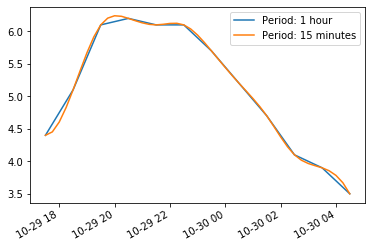

In [642]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

## Fuso horário
Por padrão, as datas elas não conhecem os fusos horários, portanto, 30/10/2016 - 02:30 pode significar 30 de outubro de 2016 às 02:30 em Paris ou Nova York. Podemos fazer com que o horário fique definido de acordo com o fuso horário local chamando o método `tz_localize()`:

In [643]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
Freq: H, dtype: float64

Observe que `-04:00` agora é anexado a todas as datas e horários. Isso significa que essas datas referem-se a [UTC](https://pt.wikipedia.org/wiki/Tempo_Universal_Coordenado) - 4 horas.

Podemos converter essas datas para a hora de Paris assim:

In [644]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

Você deve ter notado que o deslocamento do UTC muda de `+02:00` para` +01:00`: isso ocorre porque a França muda para o horário de inverno às 3 da manhã naquela noite em particular (o horário volta às 2 da manhã). Observe que 2:30 da manhã ocorre duas vezes! Vamos voltar a uma representação de horário normal (se você registrar alguns dados de hora em hora usando a hora local, sem armazenar o fuso horário, poderá obter algo assim):

In [645]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
Freq: H, dtype: float64

# `DataFrame`
Podemos considerar um `DataFrame` com dicionários de `Series`.

## Criando um `DataFrame`
Você pode criar `DataFrame`s passando dicionários de `Series`:

In [646]:
people_dict = {
    "peso": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "ano": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "filho": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Andar de bicicleta", "dançar"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,peso,ano,filho,hobby
alice,68,1985,NaN,Andar de bicicleta
bob,83,1984,3.0,dançar
charles,112,1992,0.0,NaN


Pontos importantes para se notar:
* as `Series` foram automaticamente alinhadas baseadas nos seus índices
* valores ausentes são representados por `NaN`
* o nome da `Series` foi ignorado (o nome `year` foi descartado)
* `DataFrame` são mostrados de uma forma bem legal em Nootebooks.

Você pode acessar as colunas bem facilmente, elas retornam uma `Series`:

In [647]:
people["ano"]

alice      1985
bob        1984
charles    1992
Name: ano, dtype: int64

Acessando multiplas colunas:

In [648]:
people[["ano", "hobby"]]

,ano,hobby
alice,1985,Andar de bicicleta
bob,1984,dançar
charles,1992,NaN


Se você passar uma lista de colunas e/ou linhas para o construtor do `DataFrame`, isso garantirá que essas colunas e/ou linhas existam, nessa ordem, e nenhuma outra coluna/linha passa a existir. Por exemplo:

In [649]:
d2 = pd.DataFrame(
        people_dict,
        columns=["ano", "peso", "altura"],
        index=["bob", "alice", "eugene"]
     )
d2

,ano,peso,altura
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Outra maneira conveniente de criar um `DataFrame` é passar todos os valores para o construtor como um` ndarray`, ou uma lista de listas, e especificar os nomes das colunas e os rótulos dos índices das linhas separadamente:

In [650]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["ano", "filho", "hobby", "peso"],
        index=["alice", "bob", "charles"]
     )
d3

,ano,filho,hobby,peso
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Para especificar valores ausentes, você pode usar tanto `np.nan`, quanto as mascaras do NumPy:

In [651]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["ano", "filho", "hobby", "peso"],
        index=["alice", "bob", "charles"]
     )
d3

,ano,filho,hobby,peso
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Em vez de um `ndarray`, você também pode passar um objeto `DataFrame`:

In [652]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "filho"],
         index=["alice", "bob"]
     )
d4

,hobby,filho
alice,Biking,NaN
bob,Dancing,3


Também é possível criar um `DataFrame` com um dicionário (ou lista) de dicionários (ou lista):

In [653]:
people = pd.DataFrame({
    "ano": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"andar de bicicleta", "bob": "dançar"},
    "peso": {"alice":68, "bob": 83, "charles": 112},
    "filho": {"bob": 3, "charles": 0}
})
people

,ano,hobby,peso,filho
alice,1985,andar de bicicleta,68,NaN
bob,1984,dançar,83,3.0
charles,1992,NaN,112,0.0


## Multi-indexing
Se todas as colunas forem tuplas do mesmo tamanho, elas serão entendidas como multi-índice. O mesmo vale para as linhas. Por exemplo:

In [654]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

Agora você pode acessar um `DataFrame` contendo todas as colunas `public` de maneira muito simples:

In [655]:
d5["public"]

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [656]:
d5["public", "hobby"]  # mesmo que d5["public"]["hobby"]

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

## Dropando níveis
Vamos dar uma olhada em `d5` novamente

In [657]:
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

Existem dois níveis de colunas e dois níveis de índices. Podemos eliminar um nível de coluna chamando `droplevel()` (o mesmo vale para índices):

In [658]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

## Transpondo
Você pode transpor um data frame usando o atributo `T`

In [659]:
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN        3       0

## Empilhando níveis
O método `stack()` irá inserir o nível mais baixo da coluna após o índice mais baixo:

In [660]:
d7 = d6.stack()
d7

London    Paris
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
children  bob        NaN        3
          charles      0      NaN

Observe que muitos valores de ``NaN`` apareceram. Isso faz sentido, porque muitas novas combinações não existiam antes (por exemplo, não havia `bob` em `London`).

Chamar `unstack()` fará o inverso, mais uma vez criando muitos valores `NaN`.

In [661]:
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN       0     NaN        3     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

Se chamarmos `unstack` novamente, ficaremos com uma `Series`:

In [662]:
d9 = d8.unstack()
d9

London  alice    birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        bob      birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        charles  birthyear       1992
                 children           0
                 hobby            NaN
                 weight           112
Paris   alice    birthyear       1985
                 children         NaN
                 hobby         Biking
                 weight            68
        bob      birthyear       1984
                 children           3
                 hobby        Dancing
                 weight            83
        charles  birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
dtype: object

Os métodos `stack()` e `unstack()` permitem selecionar o `level` para empilhar/desempilhar. Você pode até empilhar/desempilhar vários `level`s ao mesmo tempo:

In [663]:
d10 = d9.unstack(level = (0,1))
d10

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN       0     NaN        3     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

## A maioria dos métodos retorna cópias modificadas
Como você deve ter notado, os métodos `stack()` e `unstack()` não modificam o objeto ao qual se aplicam. Em vez disso, eles trabalham em uma cópia e a devolvem. Isto é verdade para a maioria dos métodos em pandas.

## Acessando linhas
Vamos dar uma olhada no `DataFrame` `people`:

In [664]:
people

,ano,hobby,peso,filho
alice,1985,andar de bicicleta,68,NaN
bob,1984,dançar,83,3.0
charles,1992,NaN,112,0.0


O atributo `loc` acessa linhas ao invés de colunas. O resultado é uma `Series` no qual o nome das colunas do `DataFrame` são mapeadas nas linhas.

In [665]:
people.loc["charles"]

ano      1992
hobby     NaN
peso      112
filho       0
Name: charles, dtype: object

Você também pode acessar linhas pelo índice usando o atributo iloc:

In [666]:
people.iloc[2]

ano      1992
hobby     NaN
peso      112
filho       0
Name: charles, dtype: object

Você também pode acessar um intervalo de linhas, e isso retorna um `DataFrame`:

In [667]:
people.iloc[1:3]

,ano,hobby,peso,filho
bob,1984,dançar,83,3.0
charles,1992,NaN,112,0.0


Por fim, você pode passar um array booleano para obter as linhas correspondentes:

In [668]:
people[np.array([True, False, True])]

,ano,hobby,peso,filho
alice,1985,andar de bicicleta,68,NaN
charles,1992,NaN,112,0.0


Isso é mais útil quando usamos expressões condicionais:

In [669]:
people[people["ano"] < 1990]

,ano,hobby,peso,filho
alice,1985,andar de bicicleta,68,NaN
bob,1984,dançar,83,3.0


## Adicionando e removendo colunas
Geralmente você pode tratar um `DataFrame` como um dicionário de `Series`, portanto os seguintes códigos funcionam:

In [670]:
people

,ano,hobby,peso,filho
alice,1985,andar de bicicleta,68,NaN
bob,1984,dançar,83,3.0
charles,1992,NaN,112,0.0


In [671]:
people["idade"] = 2018 - people["ano"]  # adiciona uma nova coluna "idade"
people["acima de 30"] = people["idade"] > 30      # adiona outra coluna "acima de 30"
birthyears = people.pop("ano")
del people["filho"]

people

,hobby,peso,idade,acima de 30
alice,andar de bicicleta,68,33,True
bob,dançar,83,34,True
charles,NaN,112,26,False


In [672]:
birthyears

alice      1985
bob        1984
charles    1992
Name: ano, dtype: int64

Quando você adiciona uma nova coluna, ela deve ter o mesmo número de linhas. As linhas ausentes são preenchidas com NaN e as linhas extras são ignoradas:

In [673]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice naõ tem, eugene é ignorado
people

,hobby,peso,idade,acima de 30,pets
alice,andar de bicicleta,68,33,True,NaN
bob,dançar,83,34,True,0.0
charles,NaN,112,26,False,5.0


Ao adicionar uma nova coluna, ela é adicionada no final (à direita) por padrão. Você também pode inserir uma coluna em qualquer outro lugar usando o método `insert()`:

In [674]:
people.insert(1, "altura", [172, 181, 185])
people

,hobby,altura,peso,idade,acima de 30,pets
alice,andar de bicicleta,172,68,33,True,NaN
bob,dançar,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## Atribuindo novas colunas
Você também pode criar novas colunas chamando o método `assign()`. Observe que isso retorna um novo objeto `DataFrame`, o original não é modificado:

In [675]:
people.assign(
    IMC = people["peso"] / (people["altura"] / 100) ** 2,
    tem_pets = people["pets"] > 0
)

,hobby,altura,peso,idade,acima de 30,pets,IMC,tem_pets
alice,andar de bicicleta,172,68,33,True,NaN,22.985398,False
bob,dançar,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


Observe que você não pode acessar as colunas criadas dentro da mesma atribuição:

In [676]:
try:
    people.assign(
        IMC = people["peso"] / (people["altura"] / 100) ** 2,
        sobrepeso = people["IMC"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'IMC'


A solução é dividir essa atribuição em duas atribuições consecutivas:

In [677]:
d6 = people.assign(IMC = people["peso"] / (people["altura"] / 100) ** 2)
d6.assign(sobrepeso = d6["IMC"] > 25)

,hobby,altura,peso,idade,acima de 30,pets,IMC,sobrepeso
alice,andar de bicicleta,172,68,33,True,NaN,22.985398,False
bob,dançar,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


Ter que criar uma variável temporária `d6` não é muito conveniente. Você pode encadear as chamadas, mas não funcionará porque o objeto `people` não é realmente modificado pela primeira atribuição:

In [678]:
try:
    (people
         .assign(IMC = people["peso"] / (people["altura"] / 100) ** 2)
         .assign(sobrepeso = people["IMC"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'IMC'


Mas não tema, existe uma solução simples. Você pode passar uma função para o método `assign()` (normalmente uma função `lambda`), e essa função será chamada com o `DataFrame` como parâmetro:

In [679]:
(people
     .assign(IMC = lambda df: df["peso"] / (df["altura"] / 100) ** 2)
     .assign(sobrepeso = lambda df: df["IMC"] > 25)
)

,hobby,altura,peso,idade,acima de 30,pets,IMC,sobrepeso
alice,andar de bicicleta,172,68,33,True,NaN,22.985398,False
bob,dançar,181,83,34,True,0.0,25.335002,True
charles,NaN,185,112,26,False,5.0,32.724617,True


## Avaliando uma expressão
Um ótimo recurso suportado pelo pandas é a avaliação de expressões. Isso depende da biblioteca `numexpr` que deve ser instalada.

In [680]:
people.eval("peso / (altura/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

Expressões de atribuição também são suportadas. Vamos definir `inplace = True` para modificar diretamente o `DataFrame` em vez de obter uma cópia modificada:

In [681]:
people.eval("IMC = peso / (altura/100) ** 2", inplace=True)
people

,hobby,altura,peso,idade,acima de 30,pets,IMC
alice,andar de bicicleta,172,68,33,True,NaN,22.985398
bob,dançar,181,83,34,True,0.0,25.335002
charles,NaN,185,112,26,False,5.0,32.724617


Você pode usar uma variável local ou global em uma expressão através do prefixo `'@'`:

In [682]:
limiar_sobrepreso = 30
people.eval("sobrepeso = IMC > @limiar_sobrepreso", inplace=True)
people

,hobby,altura,peso,idade,acima de 30,pets,IMC,sobrepeso
alice,andar de bicicleta,172,68,33,True,NaN,22.985398,False
bob,dançar,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


## Query em `DataFrame`
O método `query()` permite criar "filtros" no `DataFrame` baseado em expressões:

In [683]:
people.query("idade > 30 and pets == 0")

,hobby,altura,peso,idade,acima de 30,pets,IMC,sobrepeso
bob,dançar,181,83,34,True,0.0,25.335002,False


## Ordenando um `DataFrame`
Você pode ordenar um `DataFrame` chamando seu método `sort_index`. Por padrão, ele classifica as linhas pelos índices, em ordem crescente, mas vamos reverter a ordem:

In [684]:
people.sort_index(ascending=False)

,hobby,altura,peso,idade,acima de 30,pets,IMC,sobrepeso
charles,NaN,185,112,26,False,5.0,32.724617,True
bob,dançar,181,83,34,True,0.0,25.335002,False
alice,andar de bicicleta,172,68,33,True,NaN,22.985398,False


Note que o `sort_index` retornou uma cópia ordenada do `DataFrame`. Para modificar o `people` diretamente, podemos definir o argumento `inplace` como `True`. Além disso, podemos classificar as colunas em vez das linhas, definindo `axis = 1`:

In [685]:
people.sort_index(axis=1, inplace=True)
people

,IMC,acima de 30,altura,hobby,idade,peso,pets,sobrepeso
alice,22.985398,True,172,andar de bicicleta,33,68,NaN,False
bob,25.335002,True,181,dançar,34,83,0.0,False
charles,32.724617,False,185,NaN,26,112,5.0,True


Para classificar o `DataFrame` pelos valores, em vez dos rótulos, podemos usar` sort_values` e especificar a coluna a ser classificada por:

In [686]:
people.sort_values(by="idade", inplace=True)
people

,IMC,acima de 30,altura,hobby,idade,peso,pets,sobrepeso
charles,32.724617,False,185,NaN,26,112,5.0,True
alice,22.985398,True,172,andar de bicicleta,33,68,NaN,False
bob,25.335002,True,181,dançar,34,83,0.0,False


## Plotando um `DataFrame`
Assim como no `Series`, o pandas facilita o plot de bons gráficos com base no` DataFrame`.

Por exemplo, é trivial criar um gráfico de linhas a partir dos dados de um `DataFrame` chamando seu método `plot`:

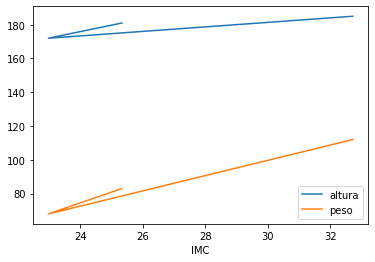

In [687]:
people.plot(kind = "line", x = "IMC", y = ["altura", "peso"])
plt.show()

Você pode passar argumentos extras suportados pelas funções do matplotlib. Por exemplo, podemos criar gráfico de dispersão e passar uma lista de tamanhos usando o argumento `s` da função` scatter( ` do matplotlib:

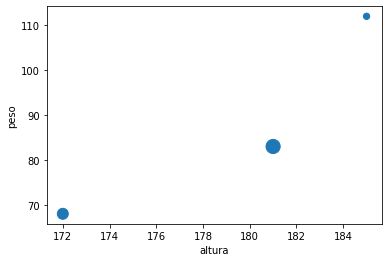

In [688]:
people.plot(kind = "scatter", x = "altura", y = "peso", s=[40, 120, 200])
plt.show()

## Operações em `DataFrame`
Embora o `DataFrame` não tente imitar arrays NumPy, existem algumas semelhanças. Vamos criar um `DataFrame` para demonstrar isso:

In [689]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


Você pode aplicar funções matemáticas NumPy em um `DataFrame`: a função é aplicada a todos os valores:

In [690]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Da mesma forma, adicionar um único valor a um `DataFrame` adicionará esse valor a todos os elementos do `DataFrame`.(*broadcasting*):

In [691]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Obviamente, o mesmo vale para todas as outras operações binárias, incluindo operações aritméticas (`*`, `/`, `**` ...) e condicionais (`>`, `==` ...):

In [692]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Operações de agregação, como calcular o `max`, a `sum` ou a `mean` de um `DataFrame`, se aplicam a cada coluna e você recebe uma `Series`:

In [693]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

O método `all` também é uma operação de agregação: verifica se todos os valores são `true` ou não. Vamos ver em que meses todos os alunos obtiveram uma nota maior que `5`:

In [694]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

A maioria dessas funções aceita um parâmetro opcional `axis`, que permite especificar em qual eixo do `DataFrame` você deseja que a operação seja executada. O padrão é `axis = 0`, o que significa que a operação é executada verticalmente (em cada coluna). Você pode definir o eixo = 1 para executar a operação horizontalmente (em cada linha). Por exemplo, vamos descobrir quais alunos tiveram todas as notas maiores que `5`:

In [695]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

O método `any` retorna `True` se algum valor for `True`. Vamos ver quem obteve pelo menos uma nota 10:

In [696]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

Se você adicionar uma `Series` a um `DataFrame` (ou executar qualquer outra operação binária), o pandas tentará transmitir a operação para todas as *linhas* do `DataFrame`. Isso funciona apenas se a `Series` tiver o mesmo tamanho que as linhas do `DataFrame`. Por exemplo, vamos subtrair a média de um `DataFrame` do mesmo `DataFrame`:

In [697]:
grades - grades.mean()  # equivalente a: grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


Subtraímos 7,75 de todas as séries de setembro, 8,75 de outubro e 7,50 de novembro. É equivalente a subtrair este `DataFrame`:

In [698]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


Se você deseja subtrair a média global de todas as séries, aqui está uma maneira de fazê-lo:

In [699]:
grades - grades.values.mean()

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## Alinhamento automático
Semelhante ao `Series`, ao operar em vários `DataFrame`s, o pandas os alinha automaticamente pelo indice da linha e também  pelos nomes das colunas. Vamos criar um `DataFrame` com pontos de bônus para cada pessoa de outubro a dezembro:

In [700]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [701]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


Parece que a adição funcionou em alguns casos, mas agora muitos elementos estão vazios. Isso ocorre porque ao alinhar o `DataFrame`s, algumas colunas e linhas estavam presentes apenas em um lado e, portanto, eram consideradas ausentes no outro lado (`NaN`). A adição de `NaN` a um número resulta em `NaN`, daí o resultado.

##  Tratando dados ausentes
Lidar com dados ausentes é uma tarefa frequente ao trabalhar com dados da vida real. O Pandas oferece algumas ferramentas para lidar com dados ausentes.
 
Vamos tentar corrigir o problema acima. Por exemplo, podemos decidir que os dados ausentes devem resultar em zero, em vez de `NaN`. Podemos substituir todos os valores de ``NaN`` por qualquer valor usando o método `fillna()`:

In [702]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


No entanto, é um pouco injusto definirmos as notas como zero em setembro. Talvez devêssemos decidir que notas ausentes são notas ausentes, mas pontos de bônus ausentes devem ser substituídos por zeros:

In [703]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Isso é muito melhor: embora tenhamos elaborado alguns dados, não fomos muito injustos.

Outra maneira de lidar com os dados ausentes é interpolar. Vamos olhar novamente para o `bonus_points` DataFrame`:

In [704]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Agora vamos chamar o método `interpolate`. Por padrão, ele interpola verticalmente (`axis = 0`), então vamos dizer para ele interpolar horizontalmente (` axis = 1`).

In [705]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Bob tinha 0 pontos de bônus em outubro e 2 em dezembro. Quando interpolamos para novembro, obtemos a média: 1 ponto de bônus. Colin teve 1 ponto de bônus em novembro, mas não sabemos quantos pontos de bônus ele teve em setembro, portanto não podemos interpolar, é por isso que ainda há um valor ausente em outubro após a interpolação. Para corrigir isso, podemos definir os pontos de bônus de setembro como 0 antes da interpolação.

In [706]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


Ótimo, agora temos pontos de bônus razoáveis em todos os lugares. Vamos descobrir as notas finais:

In [707]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


É um pouco irritante que a coluna de setembro termine à direita. Isso ocorre porque os `DataFrame`s que estamos adicionando não possuem exatamente as mesmas colunas (as `grades` `DataFrame` está ausente na coluna `dec`)); portanto, para tornar as coisas previsíveis, o pandas ordena as colunas finais em ordem alfabética. Para corrigir isso, podemos simplesmente adicionar a coluna ausente primeiro:

In [708]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


Não há muito que possamos fazer sobre dezembro e Colin: já é ruim o suficiente ganharmos pontos de bônus, mas não podemos razoavelmente compensar notas (bem, acho que alguns professores provavelmente o fazem). Então, vamos chamar o método `dropna()` para se livrar de linhas cheias de `NaN`s:

In [709]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


Agora vamos remover as colunas cheias de `NaN`s, definindo o argumento `axis = 1`:

In [710]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


## Agregação com `groupby`
Semelhante à linguagem SQL, o pandas permite agrupar seus dados em grupos para executar cálculos em cada grupo.

Primeiro, vamos adicionar alguns dados extras sobre cada pessoa para que possamos agrupá-los, e vamos voltar ao `final_grades` `DataFrame` para que possamos ver como os valores `NaN` são tratados:

In [711]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


Agora vamos agrupar dados neste `DataFrame` por hobby:

In [712]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

Estamos prontos para calcular a nota média por hobby:

In [713]:
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


Essa foi fácil! Observe que os valores ``NaN`` foram simplesmente ignorados ao calcular as médias.

## Tabelas Dinâmica (Pivot tables)
O Pandas suporta [tabelas dinâmicas](https://en.wikipedia.org/wiki/Pivot_table) semelhantes a planilhas que permitem resumo rápido de dados. Para ilustrar isso, vamos criar um simples `DataFrame`:

In [714]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [715]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


Agora podemos chamar a função `pd.pivot_table ()` para este `DataFrame`, pedindo para agrupar pela coluna `name`. Por padrão, `pivot_table()` calcula a média de cada coluna numérica:

In [716]:
pd.pivot_table(more_grades, index="name")

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


Podemos alterar a função de agregação configurando o argumento `aggfunc` e também podemos especificar a lista de colunas cujos valores serão agregados:

In [717]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)

,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


Também podemos especificar as `columns` a serem agregadas horizontalmente e solicitar os totais gerais de cada linha e coluna, definindo `margins = True`:

In [718]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


Finalmente, podemos especificar vários nomes de índices ou colunas, e o pandas criará índices de vários níveis:

In [719]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

## Visão geral das funções de um `DataFrame`
Ao lidar com grandes `DataFrames`, é útil obter uma visão geral rápida de seu conteúdo. O Pandas oferece algumas funções para isso. Primeiro, vamos criar um grande `DataFrame` com uma mistura de valores numéricos, valores ausentes e valores de texto. Observe como o Jupyter exibe apenas os cantos do `DataFrame`:

In [720]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


O método `head()` retorna as 5 primeiras linhas:

In [721]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


Claro que também existe uma função `tail()` para visualizar as 5 linhas finais. Você pode passar o número de linhas que deseja:

In [722]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


O método `info()` imprime um resumo do conteúdo de cada coluna:

In [723]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

O método `describe()` fornece uma boa visão geral das principais estatísticas de cada coluna:
* `count`: número de elementos não-nulos
* `mean`: média
* `std`: Desvio Padrão
* `min`: valor mínimo
* `25%`, `50%`, `75%`: 25º, 50º and 75º [percentils](https://pt.wikipedia.org/wiki/Percentil)
* `max`: valor máximo

In [724]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Próximos passos
Pandas é uma biblioteca bem grande e com muitas características. Apesar de termos abordado as características mais importantes, ainda tem muita coisa para aprender. Provavalmente a melhor maneira de aprender é botando a mão na massa com dados reais. Além disso, é uma boa ideia estudar um pouco mais com a excelente [documentação](http://pandas.pydata.org/pandas-docs/stable/index.html), em especial o [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html).